# Notebook to compute critical Stokes number and collection efficiency for an ellipse in 2D inviscid flow

Copyright (C) 2025 [Richard Sear](https://richardsear.me/)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
#


always 1 long along y axis
major axis of ellipse along x axis
major axis of ellipse along x axis, length along x and y  2.1 1.0
minor and major axes  1.0 2.1
 chord a parameter  1.55
c  0.9233092656309695  should be in range 0 (for circle) to 1 (chord)


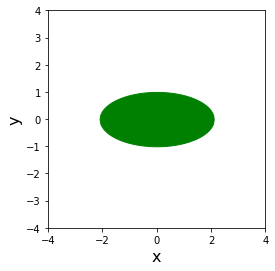

In [2]:
print('always 1 long along y axis')
    
def define_ellipse(value_to_set_length_x_axis):
    global x_ellipse,y_ellipse_top,semi_minor_axis,semi_major_axis
    global a_chord,c_conformal,length_x_axis
    global major_axis_alongy
    length_x_axis=value_to_set_length_x_axis
#
    if(value_to_set_length_x_axis<1.0):
        major_axis_alongy=True
        print('major axis of ellipse along y axis')
    else:
        major_axis_alongy=False
        print('major axis of ellipse along x axis')
#
    if(major_axis_alongy):
        semi_major_axis=1.0
        semi_minor_axis=value_to_set_length_x_axis
        if(semi_minor_axis > semi_major_axis): exit()
        print('major axis of ellipse along y axis, length along x and y ',semi_minor_axis,semi_major_axis)
    else:
        semi_minor_axis=1.0
        semi_major_axis=value_to_set_length_x_axis
        print('major axis of ellipse along x axis, length along x and y ',semi_major_axis,semi_minor_axis)
        if(semi_minor_axis > semi_major_axis): exit()
#
    print('minor and major axes ',semi_minor_axis,semi_major_axis)
    a_chord=0.5*(semi_major_axis+semi_minor_axis)
    c_conformal=np.sqrt(0.5*a_chord*(semi_major_axis-semi_minor_axis))
    print(' chord a parameter ',a_chord)
    print('c ',c_conformal,' should be in range 0 (for circle) to 1 (chord)')
    if( major_axis_alongy ):
        x_ellipse=np.linspace(-semi_minor_axis,semi_minor_axis,200)
        y_ellipse_top=semi_major_axis*np.sqrt(1.0-x_ellipse**2/semi_minor_axis**2)
    else:
        x_ellipse=np.linspace(-semi_major_axis,semi_major_axis,200)
        y_ellipse_top=semi_minor_axis*np.sqrt(1.0-x_ellipse**2/semi_major_axis**2)
    return





length_x_axis=2.1
define_ellipse(length_x_axis)


def inside_ellipse(x1,y1):
    if(major_axis_alongy):
        f=x1**2/semi_minor_axis**2+y1**2/semi_major_axis**2
    else:
        f=x1**2/semi_major_axis**2+y1**2/semi_minor_axis**2
#
    eps=1.0e-9
    if(f<1.0-eps):
        inside=True
    else:
        inside=False
#
    return inside




plt.fill_between(x_ellipse,y_ellipse_top,-y_ellipse_top,color='green')
#
plt.gca().set_aspect('equal')

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

plt.xlim([-4,4])
plt.ylim([-4,4])
#plt.savefig('streamy3.png')
plt.show()

define flow field for inviscid flow around an ellipse in inviscid flow

In [3]:

# flow field for inviscid flow around an ellipse

def u_ff(xff,yff):
# longer along x axis than along y
    z=xff + yff*1j
    if(major_axis_alongy):
# to rotate ellipse
        exp_fac=np.exp(1j*np.pi/2.0)
        exp_fac_sq=exp_fac**2
        if (np.real(z*exp_fac) > 0):
            bigZ=0.5*(z*exp_fac+np.sqrt(z**2*exp_fac_sq-4*c_conformal**2))
        else:
            bigZ=0.5*(z*exp_fac-np.sqrt(z**2*exp_fac_sq-4*c_conformal**2))
#Calulates the complex potential for flow past a plate at angle alpha
        numerator=U*(1.0/exp_fac-exp_fac*a_chord**2/bigZ**2)
        denominator=(1.0/exp_fac)*(1.0-c_conformal**2/bigZ**2)
    else:
# not rotated
        if (np.real(z)>0):
            bigZ=0.5*(z+np.sqrt(z**2-4*c_conformal**2))
        else:
            bigZ=0.5*(z-np.sqrt(z**2-4*c_conformal**2))
#Calulates the complex potential for flow past a plate at angle alpha
        numerator=U*(1.0-a_chord**2/bigZ**2)
        denominator=(1.0-c_conformal**2/bigZ**2)
#  now compute Velocity components.
    ux=np.real(numerator/denominator)
    uy=-np.imag(numerator/denominator)
#
    return ux,uy


set flow far from ellipse to be $0.5$ - this gives critical Stokes number of $1/4$ - the rescaled value we use. Set U=1 for $1/8$ value in most earlier work

In [4]:
U=0.5 # % Flow velocity which should become 1 with non-dimensionalisation#
print('flow speed of inviscid flow far from ellipse ',U)



flow speed of inviscid flow far from ellipse  0.5


In [5]:
def fderivs_onaxis(t,array_var):
    x1=array_var[0]
    vx=array_var[1]
# get flow field velocity
    usfp,vsfp=u_ff(x1,0.0)
#
    dvxdt=-(vx-usfp)/Stokes
    return vx,dvxdt
#

def escape_onaxis(t,array_var):
    x1=array_var[0]
#    tolerance=1.0e-03
    indicator=1.0
#    inside=inside_ellipse(x1,0.0)
#if(inside): indicator=-1.0
    if(x1  > -length_x_axis): indicator=-1.0
    return indicator

In [6]:
escape_onaxis.terminal = True

define_ellipse(length_x_axis)
Stokes=0.9
#
t_max= 160.0
t_eval = np.linspace(0.0, t_max, 100001)
x0=-8.0
y0=0.0#1.0e-5
dxdt0,dydt0=u_ff(x0,y0)
initialBC_array=np.array([x0,dxdt0])
sol0 = solve_ivp(fderivs_onaxis, [0, t_max], initialBC_array, t_eval=t_eval, \
                 events=[escape_onaxis],rtol=1.0e-07,atol=1.0e-8,max_step=1e-2)
print(sol0)

major axis of ellipse along x axis
major axis of ellipse along x axis, length along x and y  2.1 1.0
minor and major axes  1.0 2.1
 chord a parameter  1.55
c  0.9233092656309695  should be in range 0 (for circle) to 1 (chord)
  message: 'A termination event occurred.'
     nfev: 8108
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.00000e+00, 1.60000e-03, 3.20000e-03, ..., 1.35024e+01,
       1.35040e+01, 1.35056e+01])
 t_events: [array([13.50643101])]
        y: array([[-8.        , -7.99922019, -7.99844037, ..., -2.10066424,
        -2.10040023, -2.10013669],
       [ 0.48738419,  0.48738418,  0.48738418, ...,  0.16514927,
         0.1648574 ,  0.16456531]])
 y_events: [array([[-2.1       ,  0.16441353]])]


In [7]:
def find_Stc(St_min,St_max):
    global Stokes
    n_traj=14
#    ymin=0.0
#    ymax=2*a
    print('starting with St','{:9.3f}'.format(St_min), \
          '{:9.3f}'.format(St_max), \
          ' which should bracket edge of coll zone')
#
    x_collide=0.0
    y_collide=0.0
    t_collide=0.0
    for i_traj in range(0,n_traj):
# starting position and velocity
        Stokes=0.5*(St_min+St_max)
#
        t_max= 300.0
        t_eval = np.linspace(0.0, t_max, 100001)
        x0=-8.0
        y0=0.0#1.0e-5
        dxdt0,dydt0=u_ff(x0,y0)
        initialBC_array=np.array([x0,dxdt0])
        sol0 = solve_ivp(fderivs_onaxis, [0, t_max], initialBC_array, t_eval=t_eval, \
                 events=[escape_onaxis],rtol=1.0e-10,atol=1.0e-10,max_step=1e-1)
        if(sol0.status == 1):
#        if( sol0.y[0,-1] < 1.1*semi_minor_axis):
# particle has collided
            penetrated=False
            St_max=Stokes
# add collision point
            x_collide=sol0.y[0,-1]
            y_collide=sol0.y[1,-1]
            t_collide=sol0.t[-1]
            print('collided t ',t_collide,'Stokes= ',Stokes,\
                  'semi minor ',semi_minor_axis,' collision (x,y)',x_collide,y_collide)
        else:
            penetrated=True
# add collision point
            x_collide=sol0.y[0,-1]
            y_collide=sol0.y[1,-1]
            t_collide=sol0.t[-1]
            St_min=Stokes
            print('missed t ',t_collide,'Stokes, semi minor ',Stokes,\
                  semi_minor_axis,' last (x,y)',sol0.y[0,-1],sol0.y[1,-1])
#            print(sol0.t)
# now return
    return St_min,St_max,x_collide,y_collide,t_collide

In [8]:
escape_onaxis.terminal = True
length_x_axis=7
define_ellipse(length_x_axis)
minSt,maxSt,x_coll,y_coll,t_coll=find_Stc(0.05,0.5)
print('\n ellipse with l_x ',length_x_axis)
print('critical Stokes number between ',minSt,' and ',maxSt)
print(x_coll,y_coll)

major axis of ellipse along x axis
major axis of ellipse along x axis, length along x and y  7 1.0
minor and major axes  1.0 7
 chord a parameter  4.0
c  3.4641016151377544  should be in range 0 (for circle) to 1 (chord)
starting with St     0.050     0.500  which should bracket edge of coll zone
collided t  2.976 Stokes=  0.275 semi minor  1.0  collision (x,y) -7.000124920133212 0.10365337386517466
collided t  3.192 Stokes=  0.1625 semi minor  1.0  collision (x,y) -7.000064784883666 0.041656903125354174
collided t  3.459 Stokes=  0.10625000000000001 semi minor  1.0  collision (x,y) -7.000019531509837 0.009125467449363463
collided t  3.873 Stokes=  0.078125 semi minor  1.0  collision (x,y) -7.000000923459287 0.0004819870643846119
collided t  5.649 Stokes=  0.0640625 semi minor  1.0  collision (x,y) -7.000000000000708 3.213895407545293e-10
missed t  300.0 Stokes, semi minor  0.05703125 1.0  last (x,y) -7.0 1.776356839400245e-15
missed t  300.0 Stokes, semi minor  0.060546875 1.0  last (

In [9]:
n_plotpts=5
x_axis_plot=np.linspace(0.02,7.0,n_plotpts)
Stc_plot=np.zeros(n_plotpts)
for i_plot in range(0,n_plotpts):
    if(x_axis_plot[i_plot]<1):
        major_axis_alongy=True
    else:
        major_axis_alongy=False
#
    define_ellipse(x_axis_plot[i_plot])
    escape_onaxis.terminal = True
    minSt,maxSt,x_coll,y_coll,t_coll=find_Stc(0.001,0.52)
    print(minSt,maxSt)
    Stc_plot[i_plot]=0.5*(minSt+maxSt)
    print(x_coll,y_coll)


major axis of ellipse along y axis
major axis of ellipse along y axis, length along x and y  0.02 1.0
minor and major axes  0.02 1.0
 chord a parameter  0.51
c  0.4998999899979995  should be in range 0 (for circle) to 1 (chord)
starting with St     0.001     0.520  which should bracket edge of coll zone
missed t  300.0 Stokes, semi minor  0.2605 0.02  last (x,y) -0.020000000000000104 1.910679265465337e-33
missed t  300.0 Stokes, semi minor  0.39025 0.02  last (x,y) -0.02000000000000009 1.9106792654653374e-33
missed t  300.0 Stokes, semi minor  0.455125 0.02  last (x,y) -0.02000000000000008 1.9106792654653374e-33
missed t  300.0 Stokes, semi minor  0.4875625 0.02  last (x,y) -0.020000000000000073 1.910679265465337e-33
collided t  33.834 Stokes=  0.5037812500000001 semi minor  0.02  collision (x,y) -0.020000000017229194 7.4412102828169965e-09
collided t  44.367000000000004 Stokes=  0.49567187500000004 semi minor  0.02  collision (x,y) -0.020000000000000306 1.403847321191692e-13
missed t 

missed t  300.0 Stokes, semi minor  0.0334375 1.0  last (x,y) -7.0 1.399695153295881e-15
missed t  300.0 Stokes, semi minor  0.04965625 1.0  last (x,y) -7.0 1.776356839400245e-15
missed t  300.0 Stokes, semi minor  0.057765625 1.0  last (x,y) -7.0 1.776356839400245e-15
missed t  300.0 Stokes, semi minor  0.0618203125 1.0  last (x,y) -7.0 1.776356839400245e-15
collided t  5.841 Stokes=  0.06384765625 semi minor  1.0  collision (x,y) -7.000000000000129 6.805534974088628e-11
missed t  300.0 Stokes, semi minor  0.062833984375 1.0  last (x,y) -7.0 1.776356839400245e-15
collided t  6.555 Stokes=  0.06334082031249999 semi minor  1.0  collision (x,y) -7.0 2.1341161098511581e-13
missed t  300.0 Stokes, semi minor  0.06308740234374999 1.0  last (x,y) -7.0 1.776356839400245e-15
collided t  6.84 Stokes=  0.06321411132812499 semi minor  1.0  collision (x,y) -7.0 2.1224761038107243e-14
missed t  300.0 Stokes, semi minor  0.06315075683593749 1.0  last (x,y) -7.0 1.776356839400245e-15
collided t  6.90

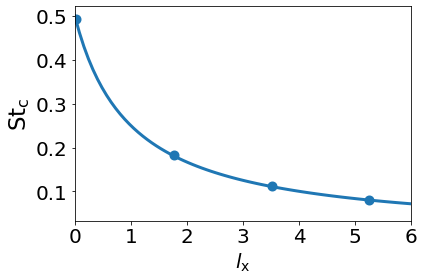

In [10]:
#
out_data = np.column_stack((x_axis_plot,Stc_plot))
# Save the data to a text file
np.savetxt('Stc_for_Josh.txt', out_data, fmt='%f')

plt.scatter(x_axis_plot,Stc_plot,lw=4)
x_axis_predict=np.linspace(0,8.0,100)
Stc_predict=0.5/(1+x_axis_predict)
plt.plot(x_axis_predict,Stc_predict,lw=3)
plt.ylabel('St$_\mathrm{c}$',fontsize=23)
plt.xlabel('$l_\mathrm{x}$',fontsize=20)
plt.xticks(fontsize=20)
plt.xlim([0,6])
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('ellipseStc.pdf')
plt.show()

Now that we have found St$_c$ we can move off axis and look at filtration efficiency
First define some functions.

In [11]:
def fderivs(t,array_var):
    x=array_var[0]
    y=array_var[1]
    vx=array_var[2]
    vy=array_var[3]
# get flow field velocity
    usfp,vsfp=u_ff(x,y)
#
    dvxdt=-(vx-usfp)/Stokes
    dvydt=-(vy-vsfp)/Stokes
    return vx,vy,dvxdt,dvydt
#

def escape(t,array_var):
    x1=array_var[0]
    y1=array_var[1]
#    tolerance=1.0e-03
    indicator=1.0
    inside=inside_ellipse(x1,y1)
    if(inside): indicator=-1.0
    if(x1 > 3.0): indicator=-1.0
    return indicator

Now run them to obtain plots for three different wedge angles

major axis of ellipse along y axis
major axis of ellipse along y axis, length along x and y  0.5 1.0
minor and major axes  0.5 1.0
 chord a parameter  0.75
c  0.4330127018922193  should be in range 0 (for circle) to 1 (chord)
prelims done
initial conditions x,y,v_x,v_y  -10 0.1 0.49627206677320257 7.414950825118801e-05
initial conditions x,y,v_x,v_y  -10 0.30000000000000004 0.49628088580878815 0.00022209898685696672
initial conditions x,y,v_x,v_y  -10 0.5 0.49629845498091213 0.00036900393275637487
initial conditions x,y,v_x,v_y  -10 0.7 0.4963246376104738 0.000514181506050314
initial conditions x,y,v_x,v_y  -10 0.9 0.49635923144549327 0.0006569688345776867
initial conditions x,y,v_x,v_y  -10 1.1 0.4964019718961172 0.0007967304014889352
initial conditions x,y,v_x,v_y  -10 1.3 0.49645253621005936 0.0009328648577661678
initial conditions x,y,v_x,v_y  -10 1.5 0.49651054847759246 0.0010648111289920344
initial conditions x,y,v_x,v_y  -10 1.7000000000000002 0.4965755853361114 0.00119205370860

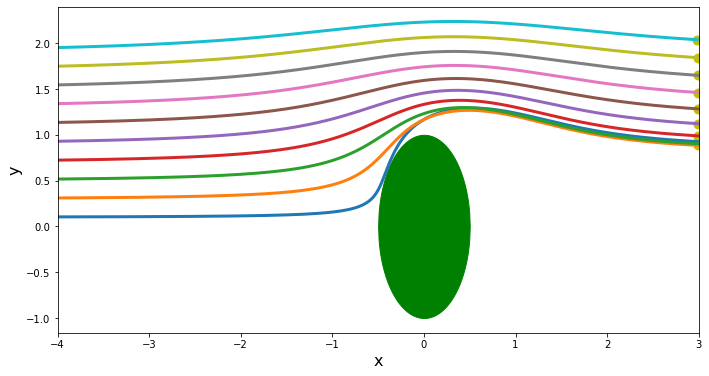

In [12]:
length_x_axis=0.5
define_ellipse(length_x_axis)


escape.terminal = True
#
#
t_max= 160.0
t_eval = np.linspace(0.0, t_max, 5001)
print('prelims done')
Stokes=0.59
#
n_pts2=10
y0s=np.linspace(0.01,0.08,n_pts2)
final_xs=np.zeros(n_pts2)
final_ys=np.zeros(n_pts2)
almostfinal_xs=np.zeros(n_pts2)
almostfinal_ys=np.zeros(n_pts2)
plt.figure(figsize=(12,6))
#
for ii in range(0,n_pts2):
    y0=0.1+float(ii)/float(n_pts2)*2.0
    x0=-10
    dxdt0,dydt0=u_ff(x0,y0)
    initialBC_array=np.array([x0,y0,dxdt0,dydt0])
    print('initial conditions x,y,v_x,v_y ',x0,y0,dxdt0,dydt0)
    sol0 = solve_ivp(fderivs, [0, t_max], initialBC_array, t_eval=t_eval, \
                events=[escape],atol=1.0e-6,rtol=1.0e-6, \
                max_step=1e-2)#,dense_output=True)
#    print(sol0.message)
    x_traj=sol0.y[0,:]
    y_traj=sol0.y[1,:]
    t_traj=sol0.t[:]
#    print(x_traj)
    plt.plot(x_traj,y_traj,lw=3)
#    print('final x and y ',x_traj[-1],y_traj[-1])
    final_xs[ii]=x_traj[-1]
    final_ys[ii]=y_traj[-1]
    almostfinal_xs[ii]=x_traj[-2]
    almostfinal_ys[ii]=y_traj[-2]
    plt.scatter(final_xs[ii],final_ys[ii],c='y',s=80)
#
plt.fill_between(x_ellipse,y_ellipse_top,-y_ellipse_top,color='green')
plt.gca().set_aspect('equal')

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim([-4,3])
#plt.ylim([-2.5,0.5])
#plt.savefig('chord_collisions.png')
plt.show()



find critical value of Stc for given ellipse

In [13]:
def root_find(ymin,ymax):
    n_traj=40
#    ymin=0.0
#    ymax=2*a
    print('starting with ys','{:9.3f}'.format(ymin), \
          '{:9.3f}'.format(ymax), \
          ' which should bracket edge of coll zone')
#
    x_collide=0.0
    y_collide=0.0
    t_collide=0.0
    for i_traj in range(0,n_traj):
# starting position and velocity
        ytry=0.5*(ymin+ymax)
#
        t_max= 400.0
        t_eval = np.linspace(0.0, t_max, 30001)
#        x0=-30.0
        x0=-35.0
        y0=ytry
        dxdt0,dydt0=u_ff(x0,y0)
        initialBC_array=np.array([x0,y0,dxdt0,dydt0])
        sol0 = solve_ivp(fderivs, [0, t_max], initialBC_array, t_eval=t_eval, \
                 events=[escape],method='RK45',rtol=1.0e-13,atol=1.0e-13)#,max_step=1e-3)
#        if(sol0.status == 1):
        if( sol0.y[0,-1] < 1.1*semi_minor_axis):
# particle has collided
            penetrated=False
            ymin=ytry
# add collision point
            x_collide=sol0.y[0,-1]
            y_collide=sol0.y[1,-1]
            t_collide=sol0.t[-1]
            print('collided t ',t_collide,'initial conditions x,y,v_x,v_y ',x0,y0,dxdt0,dydt0)
        else:
            penetrated=True
            ymax=ytry
            print('missed initial conditions x,y,v_x,v_y ',x0,y0,dxdt0,dydt0)
# now return
    return ymin,ymax,x_collide,y_collide,t_collide


major axis of ellipse along y axis
major axis of ellipse along y axis, length along x and y  0.5 1.0
minor and major axes  0.5 1.0
 chord a parameter  0.75
c  0.4330127018922193  should be in range 0 (for circle) to 1 (chord)
starting with ys     0.000     1.000  which should bracket edge of coll zone
missed initial conditions x,y,v_x,v_y  -35.0 0.5 0.49969420511758994 8.734768791870213e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.25 0.4996940648256368 4.3687195446893255e-06
collided t  71.84 initial conditions x,y,v_x,v_y  -35.0 0.125 0.49969402974148275 2.1845267137417224e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.1875 0.49969404436042314 3.276685728752988e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.15625 0.49969403632010184 2.730619263466154e-06
collided t  71.92 initial conditions x,y,v_x,v_y  -35.0 0.140625 0.49969403284807246 2.457575923162994e-06
collided t  72.01333333333334 initial conditions x,y,v_x,v_y  -35.0 0.1484375 0.4996940345384081 2.59409836770527

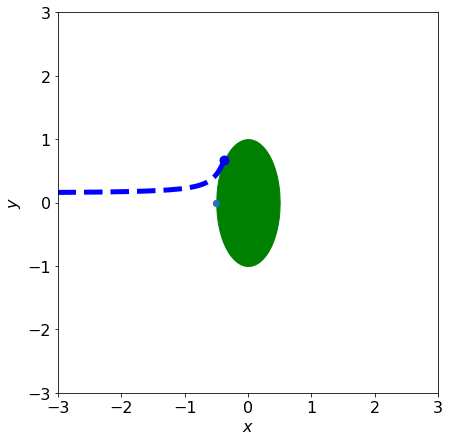

In [14]:
length_x_axis=0.5
define_ellipse(length_x_axis)
Stokes=0.8
escape.terminal = True
t_max= 160.0
t_eval = np.linspace(0.0, t_max, 5001)
#
ymin,ymax,x_collide_upper,y_collide_upper,t_collide=root_find(0.0,1.0)
print('edge of collision region between ',ymin,' and ',ymax)
#
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
y0=ymin
x0=-25.0
dxdt0,dydt0=u_ff(x0,y0)
initialBC_array=np.array([x0,y0,dxdt0,dydt0])
print('initial conditions x,y,v_x,v_y ',x0,y0,dxdt0,dydt0)
sol0 = solve_ivp(fderivs, [0, t_max], initialBC_array, t_eval=t_eval, \
                events=[escape],atol=1.0e-10,rtol=1.0e-10,method='RK45',max_step=1e-2)#
plt.plot(sol0.y[0,:],sol0.y[1,:],lw=5,color='blue',ls='--')
plt.scatter(sol0.y[0,-1],sol0.y[1,-1],s=80,color='blue')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
ax.set_aspect('equal', adjustable='box')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.fill_between(x_ellipse,y_ellipse_top,-y_ellipse_top,color='green',zorder=-9)

# plot forward? stagnation point
x_stag=-length_x_axis
y_stag=0.0
plt.scatter(x_stag,y_stag,s=40)
#plt.savefig('chord_collisions.pdf')
plt.show()

In [15]:
n_plot=5
width_plot=np.zeros(n_plot)
x_col=np.zeros(n_plot)
y_col=np.zeros(n_plot)
t_col=np.zeros(n_plot)
#
length_x_axis=1.0
#length_x_axis=0.2
#length_x_axis=5.0
define_ellipse(length_x_axis)
Stc=0.5/(1.0+length_x_axis)
Stokes_plot=Stc+np.geomspace(1.0e-2,1.0,n_plot)
delta_Stokes_plot=Stokes_plot-Stc
#
for i in range(0,n_plot):
# one ellipse

    Stokes=Stc+delta_Stokes_plot[i]
#
    ymin,ymax,x_col[i],y_col[i],t_col[i]=root_find(0.0,1.0)
    print('edge of collision region between ',ymin,' and ',ymax)
#
    width_collzone=(ymin+ymax)/2.0
    print('width coll zone          ', \
          '{:10.7f}'.format(width_collzone), '  at Stokes ',round(Stokes,3))
    width_plot[i]=width_collzone

print('done',length_x_axis)


major axis of ellipse along x axis
major axis of ellipse along x axis, length along x and y  1.0 1.0
minor and major axes  1.0 1.0
 chord a parameter  1.0
c  0.0  should be in range 0 (for circle) to 1 (chord)
starting with ys     0.000     1.000  which should bracket edge of coll zone
missed initial conditions x,y,v_x,v_y  -35.0 0.5 0.4995920865455963 1.1657049115436053e-05
missed initial conditions x,y,v_x,v_y  -35.0 0.25 0.499591899203351 5.830308845436668e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.125 0.49959185235285414 2.915377522693843e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.0625 0.4995918406392962 1.4577166508447293e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.03125 0.49959183771084836 7.28861811672122e-07
missed initial conditions x,y,v_x,v_y  -35.0 0.015625 0.4995918369787327 3.6443134161923485e-07
missed initial conditions x,y,v_x,v_y  -35.0 0.0078125 0.4995918367957036 1.8221572528257525e-07
missed initial conditions x,y,v_x,v_y  -35.0 0.00390625 0.

missed initial conditions x,y,v_x,v_y  -35.0 9.35771968215704e-05 0.49959183673470264 2.1825585264194183e-09
collided t  74.96000000000001 initial conditions x,y,v_x,v_y  -35.0 9.357708040624857e-05 0.49959183673470264 2.1825558111932532e-09
missed initial conditions x,y,v_x,v_y  -35.0 9.357713861390948e-05 0.49959183673470264 2.1825571688063357e-09
collided t  74.96000000000001 initial conditions x,y,v_x,v_y  -35.0 9.357710951007903e-05 0.49959183673470264 2.1825564899997947e-09
missed initial conditions x,y,v_x,v_y  -35.0 9.357712406199425e-05 0.49959183673470264 2.182556829403065e-09
collided t  74.96000000000001 initial conditions x,y,v_x,v_y  -35.0 9.357711678603664e-05 0.49959183673470264 2.18255665970143e-09
collided t  74.96000000000001 initial conditions x,y,v_x,v_y  -35.0 9.357712042401545e-05 0.49959183673470264 2.1825567445522474e-09
collided t  74.96000000000001 initial conditions x,y,v_x,v_y  -35.0 9.357712224300485e-05 0.49959183673470264 2.182556786977656e-09
collided t

missed initial conditions x,y,v_x,v_y  -35.0 0.058927059173583984 0.4995918402056296 1.3743842589957018e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.05892682075500488 0.4995918402056015 1.3743786983070905e-06
collided t  71.4 initial conditions x,y,v_x,v_y  -35.0 0.05892670154571533 0.49959184020558745 1.3743759179627848e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.05892676115036011 0.49959184020559444 1.374377308134938e-06
collided t  71.4 initial conditions x,y,v_x,v_y  -35.0 0.05892673134803772 0.49959184020559094 1.3743766130488612e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.058926746249198914 0.49959184020559266 1.3743769605918996e-06
collided t  71.4 initial conditions x,y,v_x,v_y  -35.0 0.05892673879861832 0.49959184020559183 1.3743767868203806e-06
collided t  71.4 initial conditions x,y,v_x,v_y  -35.0 0.058926742523908615 0.4995918402055923 1.37437687370614e-06
missed initial conditions x,y,v_x,v_y  -35.0 0.058926744386553764 0.4995918402055925 1.374376917149

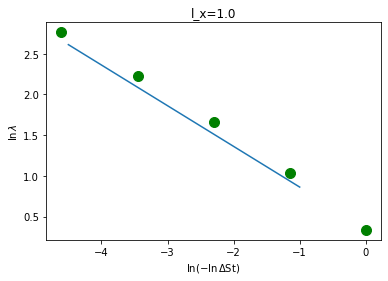

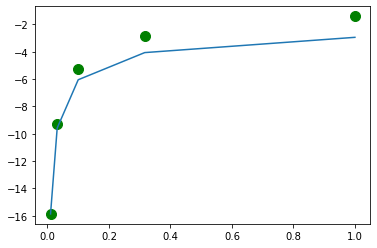

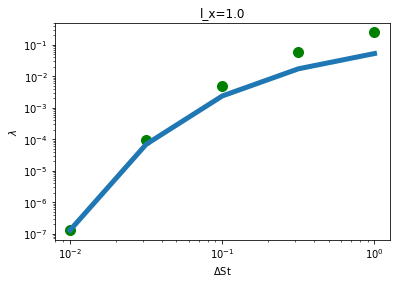

writing to   l_x=1.0.txt


In [16]:


stringy='l_x='+str(length_x_axis)
y=np.log(-1.0*np.log(width_plot))
plt.plot(np.log(delta_Stokes_plot),y,lw=0,marker='o' \
         ,ms=10,label=stringy,color='green')
prefactor=0.25*(4.0-np.sqrt(2.0))*np.pi/np.sqrt(1.0+length_x_axis)
xtmp=np.array([-4.5,-1.0])
ytmp=-0.5*xtmp+np.log(prefactor)
plt.plot(xtmp,ytmp)
plt.title(stringy)
plt.xlabel('$\ln(-\ln\Delta$St$)$')
plt.ylabel('$\ln\lambda$')
filename=stringy+'dlogs.png'
plt.savefig(filename)
plt.show()

plt.plot(delta_Stokes_plot,np.log(width_plot),lw=0,marker='o' \
         ,ms=10,label=stringy,color='green')
yy=-prefactor/np.sqrt(delta_Stokes_plot)
yy=yy-yy[0]+np.log(width_plot[0])
plt.plot(delta_Stokes_plot,yy)

plt.show()
plt.loglog(delta_Stokes_plot,width_plot,lw=0,marker='o' \
         ,ms=10,label=stringy,color='green')
plt.loglog(delta_Stokes_plot,np.exp(yy),lw=5)
plt.title(stringy)
plt.xlabel('$\Delta$St')
plt.ylabel('$\lambda$')
#filename=stringy+'.png'
#plt.savefig(filename)
plt.show()
#
out_data = np.column_stack((Stokes_plot,width_plot))
# Save the data to a text file
np.savetxt('lx1_largeSt.txt', out_data, fmt='%f')
out_data = np.column_stack((delta_Stokes_plot,width_plot))
# Save the data to a text file
filename='data/'+stringy+'.txt'
print('writing to  ',filename)
np.savetxt(filename, out_data)#, fmt='%f')